### Практическое задание к уроку 7

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1. __Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.__

In [3]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
zp

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [4]:
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
ks

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

* Расчитываю коэффициенты без intercept используя матричный метод $y=\beta_1 \cdot x$:  
### $$\hat B=(X^T \cdot X)^{-1} \cdot X^T \cdot Y$$

In [5]:
x = zp.reshape((10, 1))
x

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [6]:
y = ks.reshape((10, 1))
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [7]:
B1 = np.dot(np.linalg.inv(np.dot(x.T, x)), x.T @ y)
B1

array([[5.88982042]])

Получилось уравнение линейной ригрессии вида: $\hat y=5.89x$  
Расчитываю значение функции потерь:

In [8]:
y_hat1 = 5.89*zp
y_hat1

array([ 206.15,  265.05, 1119.1 , 1178.  ,  235.6 ,  412.3 ,  318.06,
        883.5 ,  706.8 ,  647.9 ])

In [9]:
mse1 = ((ks - y_hat1)**2).sum()/len(ks)
mse1

56516.85886

* Расчитываю коэффициенты с intercept используя матричный метод $\hat y=\beta_0 + \beta_1 \cdot x$:

In [10]:
x = np.hstack([np.ones((10, 1)), x])
x

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [11]:
B = np.dot(np.linalg.inv(np.dot(x.T, x)), x.T @ y)
B

array([[444.17735732],
       [  2.62053888]])

Получилось уравнение линейной ригрессии вида: $\hat y=444.18 + 2.62x$

* Расчитываю коэффициент $\beta_0$ и $\beta_1$ по формулам:  
### $$a=\frac{\overline{x\cdot y}-\overline x \cdot \overline y}{\overline {x^2} - \overline x^2}$$
### $$a = \overline y - b \cdot \overline x$$

In [12]:
b = (np.mean(zp*ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp)**2)
b

2.620538882402765

In [13]:
a = np.mean(ks) - B1 * np.mean(zp)
a

array([[112.6722094]])

Получилось точно такое же уравнение регрессии: $\hat y=444.18 + 2.62x$  
Расчитываю значение функции потерь:

In [14]:
y_hat2 = 444.18+2.62*zp
y_hat2

array([535.88, 562.08, 941.98, 968.18, 548.98, 627.58, 585.66, 837.18,
       758.58, 732.38])

In [15]:
mse2 = ((ks - y_hat2)**2).sum()/len(ks)
mse2

6470.417919999998

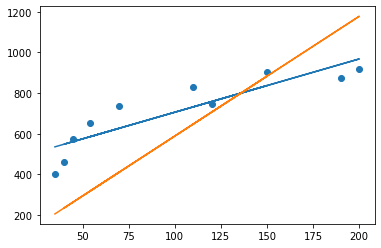

In [16]:
plt.scatter(zp, ks)
plt.plot(zp, 444.18+2.62*zp)
plt.plot(zp, 5.89*zp)
plt.show()

Значения финкции ошибки показывают, что формула линейной регрессии с intercept лучше описывает набор данных. Это же визуально подтверждают построенный график.

2. __Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).__

In [151]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
X

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [152]:
Y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
Y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [153]:
def mse_1(B1, Y=Y, X=X, n = len(X)):
    return np.sum((B1 * X - Y)**2) / n

In [163]:
alpha = 1e-6
alpha

1e-06

Нахожу производную функции ошибок:  
$$mse=\frac{\sum (\beta_1 x - y)^2}{n}$$
### $$mse'=\frac{2}{n}\cdot (\beta_1 x - y) \cdot x$$

In [164]:
B1 = 0.1
n = len(X)
n

10

In [165]:
for i in range(1, 1201):
    B1 -= alpha * (2 / n) * np.sum((B1 * X - Y) * X)
    if i % 100 == 0:
        print(f'Iteration: {i}, B1 = {B1}, mse = {mse_1(B1)}')

Iteration: 100, B1 = 5.535619041013072, mse = 58245.2515982716
Iteration: 200, B1 = 5.868151593145588, mse = 56523.327053798086
Iteration: 300, B1 = 5.888494795528504, mse = 56516.882625071215
Iteration: 400, B1 = 5.8897393229605965, mse = 56516.85850632468
Iteration: 500, B1 = 5.889815458885515, mse = 56516.858416058494
Iteration: 600, B1 = 5.889820116620584, mse = 56516.85841572067
Iteration: 700, B1 = 5.889820401564859, mse = 56516.85841571943
Iteration: 800, B1 = 5.889820418996772, mse = 56516.85841571941
Iteration: 900, B1 = 5.889820420063197, mse = 56516.8584157194
Iteration: 1000, B1 = 5.889820420128437, mse = 56516.8584157194
Iteration: 1100, B1 = 5.88982042013243, mse = 56516.85841571939
Iteration: 1200, B1 = 5.889820420132673, mse = 56516.85841571943


3. __Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).__

In [63]:
def mse_2(B_0, B_1, Y=Y, X=X, n = len(X)):
    return np.sum((B_0 + B_1 * X - Y)**2) / n

In [175]:
alpha = 0.00001
alpha

1e-05

Нахожу производные функции ошибок по $\beta_0$ и $\beta_1$:  
$$mse=\frac{\sum (\beta_0 + \beta_1 x - y)^2}{n}$$
### $$mse'_{\beta_0}=\frac{2}{n} \cdot (\beta_0+\beta_1 x - y)$$
### $$mse'_{\beta_1}=\frac{2}{n}\cdot (\beta_0+\beta_1 x - y) \cdot x$$

In [176]:
B_0, B_0_temp = 0.1, 0.1
B_1, B_1_temp = 0.1, 0.1

n = len(X)
n

10

In [177]:
for i in range(1, 4000001):
    B_0_temp -= alpha * (2 / n) * np.sum(B_0 + B_1 * X - Y)
    B_1_temp -= alpha * (2 / n) * np.sum((B_0 + B_1 * X - Y) * X)
    B_0, B_1 = B_0_temp, B_1_temp
    if i % 200000 == 0:
        print(f'Iteration: {i}, B0 = {B_0}, B1 = {B_1}, mse = {mse_2(B_0, B_1)}')

Iteration: 200000, B0 = 283.1948715093171, B1 = 3.8054411524469445, mse = 13044.231858939507
Iteration: 400000, B0 = 385.8139954492996, B1 = 3.050119029727752, mse = 7334.468421598251
Iteration: 600000, B0 = 423.01802441858695, B1 = 2.776280927667715, mse = 6583.984387436202
Iteration: 800000, B0 = 436.50615137197536, B1 = 2.677002349847291, mse = 6485.341721813873
Iteration: 1000000, B0 = 441.3962015560758, B1 = 2.6410094184769326, mse = 6472.3762554772975
Iteration: 1200000, B0 = 443.1690637841367, B1 = 2.6279603686509874, mse = 6470.672091095034
Iteration: 1400000, B0 = 443.8118057522991, B1 = 2.623229503592764, mse = 6470.448097899078
Iteration: 1600000, B0 = 444.04482850561317, B1 = 2.6215143531030956, mse = 6470.418656518683
Iteration: 1800000, B0 = 444.1293096913029, B1 = 2.6208925342251415, mse = 6470.414786781143
Iteration: 2000000, B0 = 444.15993790522555, B1 = 2.6206670970291595, mse = 6470.414278147766
Iteration: 2200000, B0 = 444.171042004665, B1 = 2.6205853659478806, mse 